# Facial Emotion Recognition for a Recommendation System

---

![](https://drive.google.com/uc?id=1OqQd7Kc0Sjs0cMv8EZtqtIsO4pI7lOWB)

### [Facebook F8 AI Hackathon 2020](https://fbai1.devpost.com/?ref_feature=challenge&ref_medium=home)
[Project Home](https://devpost.com/software/emotion-recognition-for-a-recommender-system)

### Contributors:
- [Nathan Curtis](https://github.com/njcurtis3)
- [Yashika Sharma](https://github.com/yashika51)
- [Ahmed Hamido](https://github.com/AhMeDxHaMiDo)

Special thanks to [Mahdi Ashraf](https://github.com/MahdiAshraf)




---



# [**FER-2013 Dataset**](https://datarepository.wolframcloud.com/resources/FER-2013)
The Facial Expression Recognition 2013 (FER-2013) Dataset

Originator: Pierre-Luc Carrier and Aaron Courville

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

Train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string are space-separated pixel values in row major order. test.csv contains only the "pixels" colum.

![](https://drive.google.com/uc?id=18ILChS02OWAUtMHkWDsQhHJ1IyNnA43R)

**Our task is to predict the emotion column.**

Training set: 
- 28,709 examples. 

Test set:   
- 3,589 examples. 

Validation set:
- 3,589 examples.

*This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project.*



### Sample Distribution

![](https://drive.google.com/uc?id=13qX5l-LhNDATOos-n4xSBr1WkvnmZzEW)



---



# Setup

### Mount Google Drive

In [0]:
# Mounting your google drive in order to download & load the dataset and save the trained model.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### [Kaggle API](https://github.com/Kaggle/kaggle-api#kaggle-api)

Further Help: [GitHub - API credentials](https://github.com/Kaggle/kaggle-api#api-credentials)

To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. Then go to the 'Account' tab of your user profile `(https://www.kaggle.com/<username>/account)` and select 'Create API Token'. This will trigger the download of `kaggle.json`, a file containing your API credentials. Place this file in the location `~/.kaggle/kaggle.json` (on Windows in the location `C:\Users\<Windows-username>\.kaggle\kaggle.json` - you can check the exact location, sans drive, with echo `%HOMEPATH%`). You can define a shell environment variable `KAGGLE_CONFIG_DIR` to change this location to `$KAGGLE_CONFIG_DIR/kaggle.json` (on Windows it will be `%KAGGLE_CONFIG_DIR%\kaggle.json`).

For your security, ensure that other users of your computer do not have read access to your credentials. On Unix-based systems you can do this with the following command:

`chmod 600 ~/.kaggle/kaggle.json`

You can also choose to export your Kaggle username and token to the environment:

`export KAGGLE_USERNAME=datadinosaur`

`export KAGGLE_KEY=xxxxxxxxxxxxxx`

In addition, you can export any other configuration value that normally would be in the `$HOME/.kaggle/kaggle.json` in the format 'KAGGLE_' (note uppercase).
For example, if the file had the variable "proxy" you would export `KAGGLE_PROXY` and it would be discovered by the client.

In [0]:
# Upload your Kaggle API in order to download the required dataset.
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Installs a version of the Kaggle API package

In [0]:
# installing kaggle package.

!pip install kaggle==1.5.6

In [0]:
# Preparing the API for downloading
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


The API call accesses a past Kaggle competition called [Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge)

In [0]:
# Download 'face-expression-recognition-dataset' datset from Kaggle datsets in 'Colab Notebooks' directory.
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset -p /content/gdrive/My\ Drive/Colab\ Notebooks

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Unzipping the downloaded file from Kaggle which contains the data.
img = !unzip /content/gdrive/My\ Drive/Colab\ Notebooks/face-expression-recognition-dataset.zip

### Preparing the dataset for training and validation

In [0]:
import shutil
shutil.rmtree('/content/images/images')

In [0]:
mv /content/images/validation /content/images/valid

In [0]:
import numpy as np
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
idx = [str(i) for i in np.arange(7)]
cat_to_name = dict(zip(idx, classes))
cat_to_name

{'0': 'angry',
 '1': 'disgust',
 '2': 'fear',
 '3': 'happy',
 '4': 'neutral',
 '5': 'sad',
 '6': 'surprise'}

In [0]:
import shutil
train_path = '/content/images/train'
valid_path = '/content/images/valid'
for i in range(len(cat_to_name)):
    shutil.move(train_path + '/' + cat_to_name[str(i)], train_path + '/' + str(i))
    shutil.move(valid_path + '/' + cat_to_name[str(i)], valid_path + '/' + str(i))

In [0]:
# Package imports.

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split

import json
from time import time
from PIL import Image

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

FER2013 has 3 folderst that are split over the dataset. 
- train
- valid
- test



In [0]:
# Directories.

data_dir = 'images'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In the cell below, we call `transforms.Normalize` to Normalize a tensor image with mean and standard deviation.

The Given mean: `(M1,...,Mn)` and std: `(S1,..,Sn)` for n channels, this transform will normalize each channel of the input `torch.*Tensor` i.e. `input[channel] = (input[channel] - mean[channel]) / std[channel]`

Parameters selected:
- `mean` (sequence) – Sequence of means for each channel.

- `std` (sequence) – Sequence of standard deviations for each channel.

This was used for both the `train` and `valid` data transforms

In [0]:
# Data augmentation and Normalization.

# Defining transforms for the training, validation, and testing sets
data_transforms = {'train': transforms.Compose([transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                     std=[0.229, 0.224, 0.225])
                                                ]),
                   'valid': transforms.Compose([transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                     std=[0.229, 0.224, 0.225])
                                                ])}

# Loading the datasets with ImageFolder.
image_datasets = {'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
                  'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
                 }

# Using the image datasets and the transforms to define the dataloaders.
dataloaders = {'trainloader': torch.utils.data.DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
               'validloader': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=32)
              }

Creating a set for testing because the dowmladed dataset has only training and validation sets.

In [0]:
valid_size = int(0.8 * len(image_datasets['valid']))
test_size = len(image_datasets['valid']) - valid_size
_, test_data = torch.utils.data.random_split(image_datasets['valid'], [valid_size, test_size])
image_datasets['test'] = test_data
dataloaders['testloader'] =  torch.utils.data.DataLoader(image_datasets['test'], batch_size=64)

# Displaying samples from training set

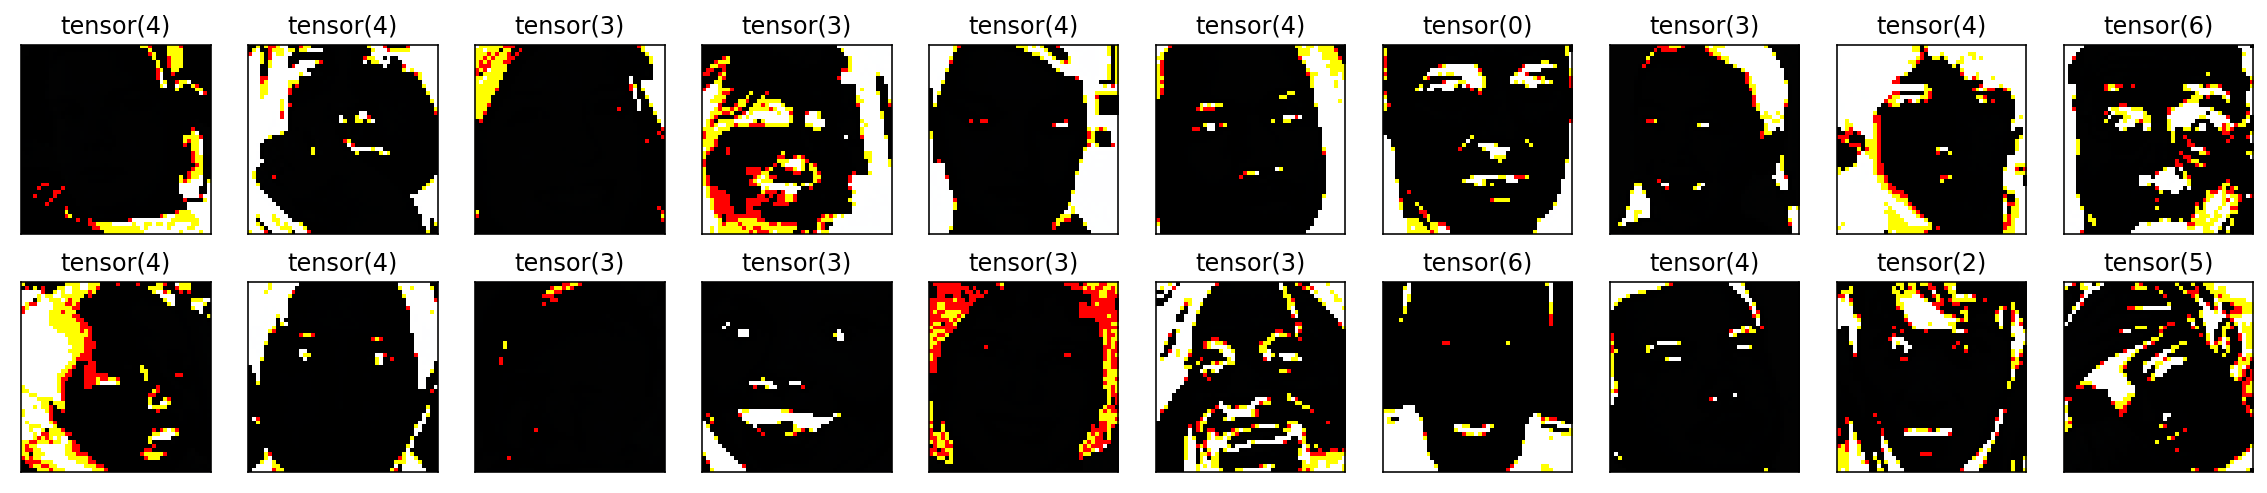

In [0]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).astype(np.uint8))

image,label=iter(dataloaders['trainloader']).next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(image[idx])
    ax.set_title(label[idx])

### Displaying images separately to see more clearly


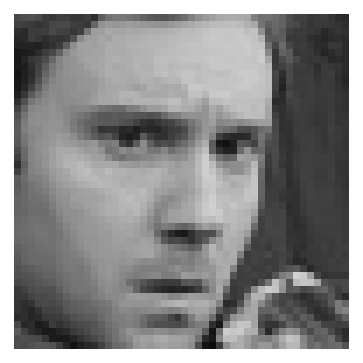

In [0]:
import cv2

# load color (BGR) image
img = cv2.imread("/content/images/train/0/0.jpg")
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.figure(figsize=(3,6))
plt.imshow(cv_rgb)
plt.axis('off')
plt.show()

### Displaying samples from validation set

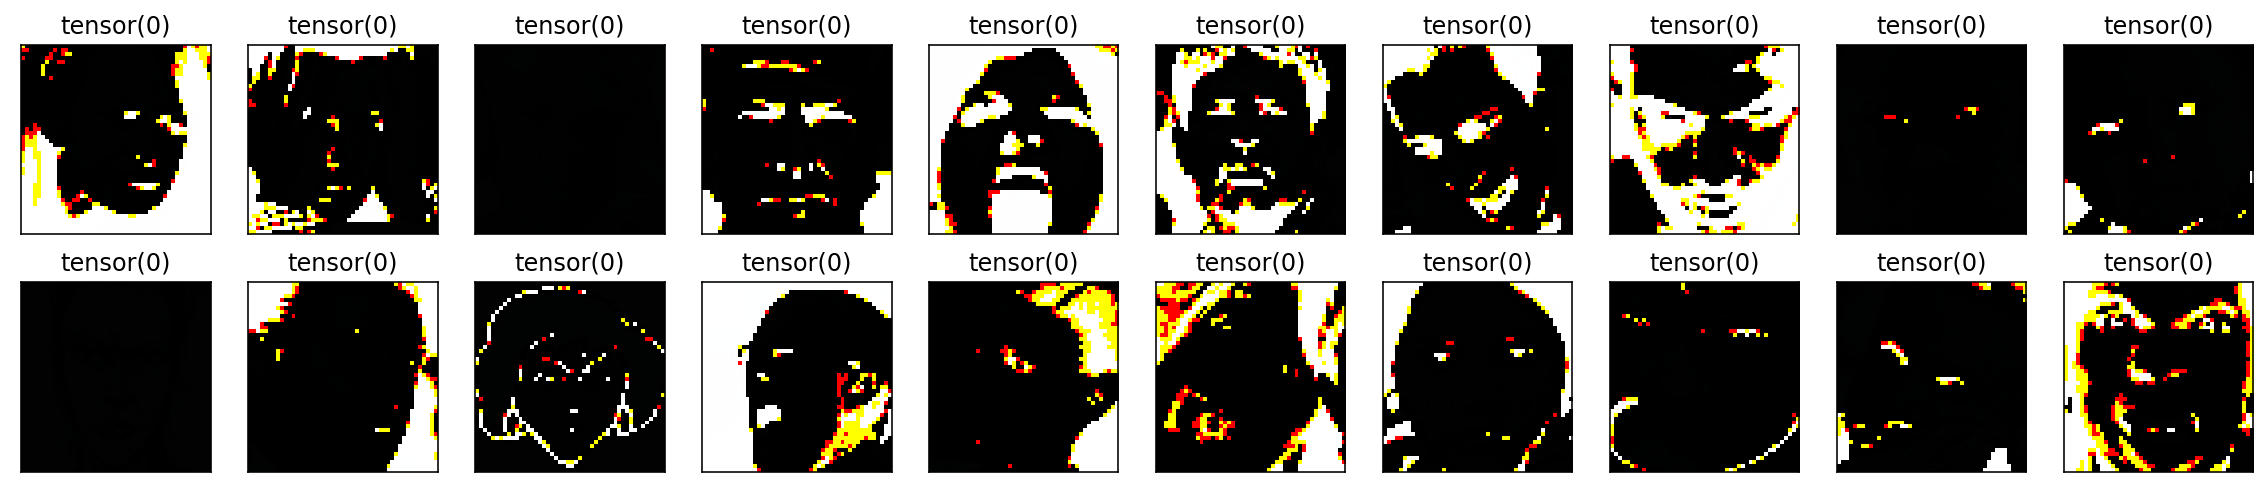

In [0]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).astype(np.uint8))

image,label=iter(dataloaders['validloader']).next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(image[idx])
    ax.set_title(label[idx])

## Neural Network Class

In [0]:
# Defining a class for the feedforward network.

class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input layer
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
        '''
        super().__init__()
        # Add the first layer, input to a hidden layer.
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers.
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output log softmax.
            Arguments
            ---------
            self: all layers
            x: tensor vector
        '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout.        
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)

        x = self.output(x)
        
        return F.log_softmax(x, dim=1)

![](https://drive.google.com/uc?id=12YYtXgGuHCS2PVX3oAymuRGg4vw5o-tt)

To use TensorBoard with PyTorch in Colab, use the `tensorboardcolab` library. This library works independently of the TensorBoard and uses [ngrok](https://ngrok.com/) to tunnel TensorBoard to localhost. See this [Stack Overflow Answer](https://stackoverflow.com/a/48468512/1514728) for more details. 

[**Article Reference**](https://medium.com/looka-engineering/how-to-use-tensorboard-with-pytorch-in-google-colab-1f76a938bc34)

[njcurtis3/tensorboardcolab](https://github.com/njcurtis3/tensorboardcolab)

**Colab Notebook for Reference on tensorboardcolab**:
[PyTorch tensorboardcolab](https://github.com/njcurtis3/tensorboardcolab)

In [0]:
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab

Using TensorFlow backend.


## Validation Function

In [0]:
# Definig a function for the validation pass.

def validation(model, validloader, criterion, device):
    ''' Builds a feedforward network with arbitrary hidden layers, 
        returns the validation loss and  validation accuracy.
        
        Arguments
        ---------
        model: the pre-trained model.
        validloader: generator, the validation dataset.
        criterion: loss function.
        device: the used device for the training [GPU or CPU].
    '''
    # Initiate the validation accuracy & validation loss with 0.
    valid_accuracy = 0
    valid_loss = 0
    # Move model to the device
    model.to(device)
    
    # Looping through the data batches.
    for inputs, labels in validloader:
        # Move input and label tensors to the device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        #inputs.resize_(inputs.shape[0], 48*48)

        # Forward pass through the network.
        output = model.forward(inputs)
        # Increase the validation loss by the loss of the predicted output with the labels.
        valid_loss += criterion(output, labels).item()

        ## Calculating the accuracy 
        # Model's output is log-softmax, so take exponential to get the probabilities.
        ps = torch.exp(output)
        # Class with highest probability is our predicted class, compare with true label.
        equality = (labels.data == ps.max(dim=1)[1])
        # Accuracy is number of correct predictions divided by all predictions, so we just take the mean.
        valid_accuracy += equality.type(torch.FloatTensor).mean()

    return valid_loss, valid_accuracy

## Training Function

In [0]:
# Definig a function for the training process

def training(model, criterion, optimizer, device, trainloader, validloader, epochs=5, print_every=40*6):
    ''' Builds a feedforward network with arbitrary hidden layers.
        
        Arguments
        ---------
        model: the pre-trained model.
        optimizer: which we will take a step with it to update the weights.
        criterion: loss function.
        device: the used device for the training [GPU or CPU].
        trainloader: generator, the training dataset.
        validloader: generator, the validation dataset.
        epochs: integer, number of trainings.
        print_every: integer, printing the updates on loss & accuracy every print_every value.
    '''
    
    steps = 0
    running_loss = 0
  
    train_l=[]
    valid_l=[]
    tb = TensorBoardColab()
  
    # Move model to the device
    model.to(device)
    
    for e in range(epochs):
        # Model in training mode, dropout is on.
        model.train()
        for inputs, labels in trainloader:
            # Move input and label tensors to the device.
            inputs, labels = inputs.to(device), labels.to(device)
            
            steps += 1
            
            # zero-ing the accumalated gradients.
            optimizer.zero_grad()

            # Forward pass through the network
            output = model.forward(inputs)
            # Calculate the loss
            loss = criterion(output, labels)
            # Backward pass through the network 
            loss.backward()
            # Take a step with the optimizer to update the weights
            optimizer.step()
            
            running_loss += loss.item()
            train_l.append(running_loss)

            if steps % print_every == 0:
                # Model in inference mode, dropout is off
                model.eval()
                
                # Turn off gradients for validation saves memory and computations, so will speed up inference
                with torch.no_grad():
                    valid_loss, valid_accuracy = validation(model, validloader, criterion, device)
                valid_l.append(valid_loss)
                
                
                # Displaying the validation loss and accuracy during the training. 
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Validation Loss: {:.3f}.. ".format(valid_loss/len(validloader)),
                      "Validation Accuracy: {:.3f}".format(valid_accuracy/len(validloader)))
            
                running_loss = 0
                
                # Make sure dropout and grads are back on for training
                model.train()
            
   
                # Recording to Tensorboard -------------------------------------------------
 
                tb.save_value('Valid_Loss', 'valid_loss', steps, loss.item())
                tb.save_value('Training_Loss', 'running_loss', steps, loss.item())
                tb.save_value('Valid_Accuracy', 'valid_accuracy', steps, loss.item())
    
                
                
    return valid_l,train_l

# VGG19

Reference: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/pdf/1409.1556.pdf)

![](https://drive.google.com/uc?id=1ITWURPdjvy93KzkghdPZOYdNw2CMW6ea)

### Model Architecture


    - A fixed size of (224 * 224) RGB image was given as input to this network which means that the matrix was of shape (224,224,3).
    - The only preprocessing that was done is that they subtracted the mean RGB value from each pixel, computed over the whole training set.
    - Used kernels of (3 * 3) size with a stride size of 1 pixel, this enabled them to cover the whole notion of the image.
    - spatial padding was used to preserve the spatial resolution of the image.
    - max pooling was performed over a 2 * 2 pixel windows with sride 2.
    - this was followed by Rectified linear unit(ReLu) to introduce non-linearity to make the model classify better and to improve computational time as the previous models used tanh or sigmoid functions this proved much better than those.
    - implemented three fully connected layers from which first two were of size 4096 and after that a layer with 1000 channels for 1000-way ILSVRC classification and the final layer is a softmax function.

The column **E** in the following table is for **VGG19** *(other columns are for other variants of VGG models)*:

![](https://drive.google.com/uc?id=1G6kZhFmW1zDelmRAtPQeD7Db4rveoJBj)


In [0]:
# Using a Pretrained Network
model = models.vgg19(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

Looking at just our classifier from the model architiecture

In [0]:
print (model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [0]:
# Setting all hyper parameters in a dictionary to ease the dealing.
hyper_parameters = {'input_size': 25088,
                    'output_size': 7,
                    'hidden_layers': [1024],
                    'drop_p': 0.2,
                    'learn_rate': 0.0001,
                    'epochs': 25,
                    'model': 'vgg19'
                   }

In [0]:
# Freezing the parameters so we don't backprop through them, 
# we will backprop through the classifier parameters only later
for param in model.parameters():
    param.requires_grad = False

# Creating Feedforward Classifier
classifier = Network(input_size = hyper_parameters['input_size'], 
                     output_size = hyper_parameters['output_size'], 
                     hidden_layers = hyper_parameters['hidden_layers'], 
                     drop_p = hyper_parameters['drop_p'])

model.classifier = classifier

In [0]:
# Define the criterion (Loss function). 
criterion = nn.NLLLoss()
# Define the optimizer. Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=hyper_parameters['learn_rate'])

### Device Check - GPU/CPU

In [0]:
# Checking if the 'GPU' is available to pass it for the device variable, and if it's not, pass the 'CPU'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using Device:', device)
print()

#additional CUDA info - when using
if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))
  print('Memory Usage:')
  print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using Device: cuda:0

Tesla P100-PCIE-16GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Mar 16 09:46:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Training the model


In [0]:
# Train the model with a pre-trained network.

valid, train = training(model, criterion, optimizer, device,
                        trainloader = dataloaders['trainloader'],
                        validloader = dataloaders['validloader'],
                        epochs = hyper_parameters['epochs'])

Wait for 8 seconds...
TensorBoard link:
http://c29b126a.ngrok.io
Epoch: 1/25..  Training Loss: 1.668..  Validation Loss: 1.563..  Validation Accuracy: 0.393


Epoch: 2/25..  Training Loss: 1.568..  Validation Loss: 1.534..  Validation Accuracy: 0.409
Epoch: 2/25..  Training Loss: 1.524..  Validation Loss: 1.523..  Validation Accuracy: 0.407
Epoch: 3/25..  Training Loss: 1.509..  Validation Loss: 1.523..  Validation Accuracy: 0.413
Epoch: 3/25..  Training Loss: 1.476..  Validation Loss: 1.505..  Validation Accuracy: 0.418
Epoch: 4/25..  Training Loss: 1.466..  Validation Loss: 1.497..  Validation Accuracy: 0.429
Epoch: 4/25..  Training Loss: 1.429..  Validation Loss: 1.494..  Validation Accuracy: 0.433
Epoch: 5/25..  Training Loss: 1.425..  Validation Loss: 1.497..  Validation Accuracy: 0.426
Epoch: 5/25..  Training Loss: 1.401..  Validation Loss: 1.491..  Validation Accuracy: 0.437
Epoch: 6/25..  Training Loss: 1.377..  Validation Loss: 1.494..  Validation Accuracy: 0.429
Epoch: 6/25..

### Plotting the Training Loss & Validation Loss over Training

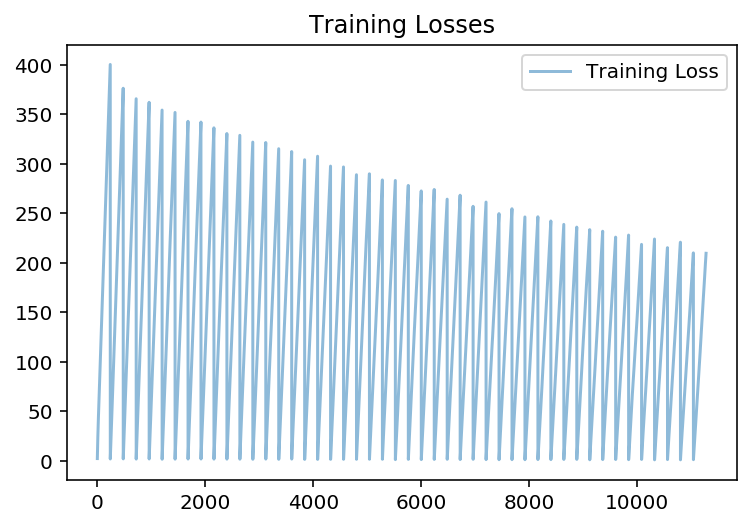

In [0]:
plt.plot(np.array(train),label='Training Loss', alpha=0.5)
plt.title("Training Losses")
plt.legend()

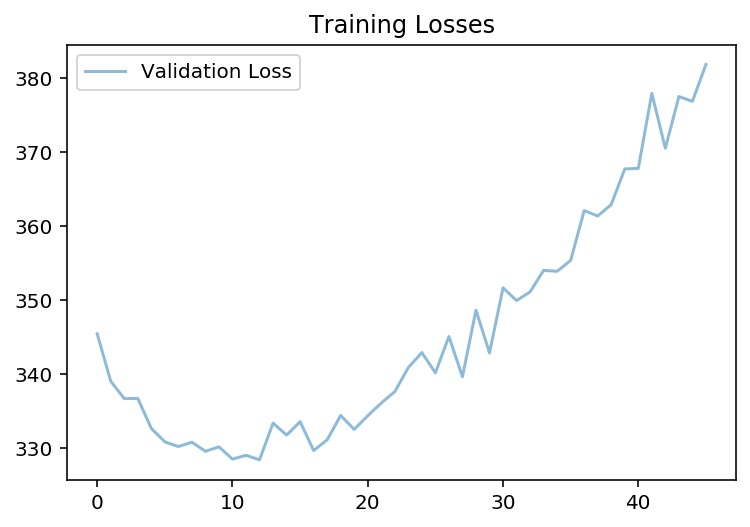

In [0]:
plt.plot(np.array(valid), label='Validation Loss', alpha=0.5)
plt.title("Training Losses")
plt.legend()

# Saving the trained model



In [0]:
# Saving the model, weights, biases, mapping of classes to indices, and hyper parameters to rebuild the model.

model.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {'input_size': hyper_parameters['input_size'],
              'output_size': hyper_parameters['output_size'],
              'hidden_layers': hyper_parameters['hidden_layers'],
              'drop_p': hyper_parameters['drop_p'],
              'model': hyper_parameters['model'],
              'class_to_idx': model.class_to_idx,
              'state_dict': model.state_dict()}

filepath = '/content/gdrive/My Drive/Colab Notebooks/vgg19.pth'

torch.save(checkpoint, filepath)

# Loading a trained model

In [0]:
# Defining a function that loads a checkpoint and rebuilds the model.

def load_checkpoint(filepath):
    ''' Builds a function to load the model, returns the model.
        
        Arguments
        ---------
        filepath: string, the path of the model checkpoint.
    '''
    # Loading the checkpoint
    checkpoint = torch.load(filepath)
    # using the pre-trained Network
    if checkpoint['model'] == 'vgg19':
        model = models.vgg19(pretrained=True)
    
    # Freezing the parameters so we don't backprop through them
    for param in model.parameters():
        param.requires_grad = False
       
    # Creating the Feedforward Classifier
    classifier = Network(input_size = checkpoint['input_size'],
                         output_size = checkpoint['output_size'],
                         hidden_layers = checkpoint['hidden_layers'], 
                         drop_p = checkpoint['drop_p'])
    
    # Replacing pre-trained calssifier by ours.
    model.classifier = classifier
    # Loading the weights and biases.
    model.load_state_dict(checkpoint['state_dict'])
    # Loading the classes to indices of our saved model.
    model.class_to_idx = checkpoint['class_to_idx']
    
    return model

In [0]:
# Loading the model & Calculating the spent time.
start = time()
filepath = '/content/gdrive/My Drive/Colab Notebooks/vgg19.pth'
model = load_checkpoint(filepath)
print("Loading vgg19.pth time = ", time() - start)

Loading vgg19.pth time =  1.7974209785461426


# Testing Function

In [0]:
# Dfefining a function for testing

def testing(model, testloader):
    ''' Builds a function to test the model, returns the testing accuracy.
        
        Arguments
        ---------
        model: the pre-trained model.
        testloader: generator, the testing dataset.
    '''
    
    # Checking if the 'GPU' is available to pass it for the device variable, and if it's not, pass the 'CPU'
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Model in inference mode, dropout is off
    model.eval()
    # Move model to the device
    model.to(device)
    accuracy = 0
    steps=0
    tb = TensorBoardColab()
    
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Turn off gradients for testing saves memory and computations, so will speed up inference
        with torch.no_grad():
            # Forward pass through the network to get the outputs
            output = model.forward(inputs)
        
        # take exponential to get the probabilities from log softmax output.
        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
        
        tb.save_value('Test_Accuracy', 'accuracy', steps,accuracy)
        steps+=1
    
        
    test_accuracy = accuracy / len(testloader)

    
    return test_accuracy

In [0]:
test_accuracy = testing(model, dataloaders['testloader'])
print("Test Accuracy: {:.3f}".format(test_accuracy))

Wait for 8 seconds...
TensorBoard link:
https://22eb394a.ngrok.io
Test Accuracy: 0.471


In [0]:
# Avergae testing

test_sum = 0
for i in range(5):
    start = time()
    test_accuracy = testing(model, dataloaders['testloader'])
    test_sum += test_accuracy
    print("Test Accuracy{}: {:.3f}".format(i, test_accuracy))
    print("testing vgg19_2.pth time = ", time() - start)
    print()

print("Average Test Accuracy: {:.3f}".format(test_sum/5))

Wait for 8 seconds...
TensorBoard link:
https://22eb394a.ngrok.io
Test Accuracy0: 0.471
testing vgg19_2.pth time =  15.486526012420654

Wait for 8 seconds...
TensorBoard link:
https://22eb394a.ngrok.io
Test Accuracy1: 0.471
testing vgg19_2.pth time =  17.287311553955078

Wait for 8 seconds...
TensorBoard link:
https://22eb394a.ngrok.io
Test Accuracy2: 0.471
testing vgg19_2.pth time =  15.52170443534851

Wait for 8 seconds...
TensorBoard link:
https://22eb394a.ngrok.io
Test Accuracy3: 0.471
testing vgg19_2.pth time =  17.884750843048096

Wait for 8 seconds...
TensorBoard link:
https://22eb394a.ngrok.io
Test Accuracy4: 0.471
testing vgg19_2.pth time =  15.13335657119751

Average Test Accuracy: 0.471


# Using the trained model for Inference

### Method 1: Displaying top (k) most likely predicted classes

In [0]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image and converts  into an object 
        that can be used as input to a trained model, returns an Numpy array.

        Arguments
        ---------
        image_path: string, path of the image.
    '''
    
    im = Image.open(image_path).convert("RGB")
    # Process a PIL image for use in a PyTorch model
    preprocess = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5,), (0.5,))
                                     ])
    preprocessed_im = preprocess(im)
    
    return preprocessed_im

In [0]:
def predict(image_path, model, device, topk):
    ''' Predict the class (or classes) of an image using a trained deep learning model,
        returns the probabilities and classes of most likely (k) predicted classes.
        
        Arguments
        ---------
        image_path: string, path of the image.
        model: the pre-trained model.
        device: string, the used device for inference which the user passed.
        topk: integer, number of most likely (k) classes.
    '''
    
    # Move model to the device
    model.to(device)
    # Model in inference mode, dropout is off
    model.eval()
    
    image = process_image(image_path)
    #print(image.size()) >>> torch.Size([3, 244, 244])
    image.unsqueeze_(0) 
    #print(image.size()) >>> torch.Size([1, 3, 244, 244])
    
    # Move image tensors to the device.
    image = image.to(device)
    
    # Turn off gradients for testing saves memory and computations, so will speed up inference.
    with torch.no_grad():
        # Forward pass through the network to get the outputs.
        prediction = model.forward(image)
    # Take exponential to get the probabilities from log softmax output.
    ps = torch.exp(prediction)
    # The most likely (topk) predicted prbabilities with their indices.
    probs, top_k_indices = ps.topk(topk)
    
    # Extracting the classes from the indices.
    classes = []
    for indice in top_k_indices.cpu()[0]:
        classes.append(list(model.class_to_idx)[indice.numpy()]) # Take the class from the index
    
    return probs.cpu()[0].numpy(), classes

In [0]:
def predict_classes_names(cat_to_name, classes_output):
    ''' Mapping the category labels to category names, returns the category names.
        
        Arguments
        ---------
        cat_to_name: dict, label mapping from category label to category name. 
        classes_output: list, The most likely (k) predicted classes labels.
    '''

    # Creating the a list contains the category names from the classes labels.
    classes_names = []
    for i in classes_output:
        classes_names.append(cat_to_name[i])
    
    return classes_names

Top 3 most likely Classes
Predicted Emotion (1):                happy	 ... 	Predicted Class Probability: 0.850
Predicted Emotion (2):              neutral	 ... 	Predicted Class Probability: 0.045
Predicted Emotion (3):                angry	 ... 	Predicted Class Probability: 0.038



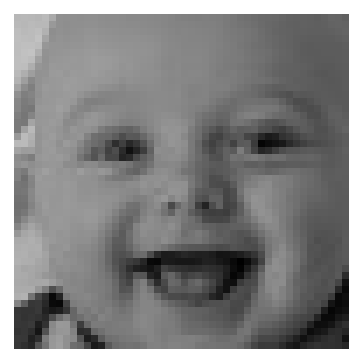

In [0]:
image_path = "/content/images/train/3/10005.jpg"
# Most likely top k predicted classes
topk = 3

probs, classes = predict(image_path, model, device, topk)

classes = predict_classes_names(cat_to_name, classes_output= classes)

print("Top {} most likely Classes".format(topk))
for i in range(len(probs)):
    print("Predicted Emotion ({}): {:>20}\t ... \tPredicted Class Probability: {:.3f}".format(i+1, classes[i], probs[i]))
print()

# load color (BGR) image
img = cv2.imread(image_path)
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# display the image, along with bounding box
plt.figure(figsize=(3,6))
plt.imshow(cv_rgb)
plt.axis('off')
plt.show()

### Method 2: Displaying the image along with the probability of each class

In [0]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.cpu().numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 48, 48).cpu().numpy().squeeze(), cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(7), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(7))
    
    ax2.set_yticklabels(cat_to_name.values(), size='medium');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

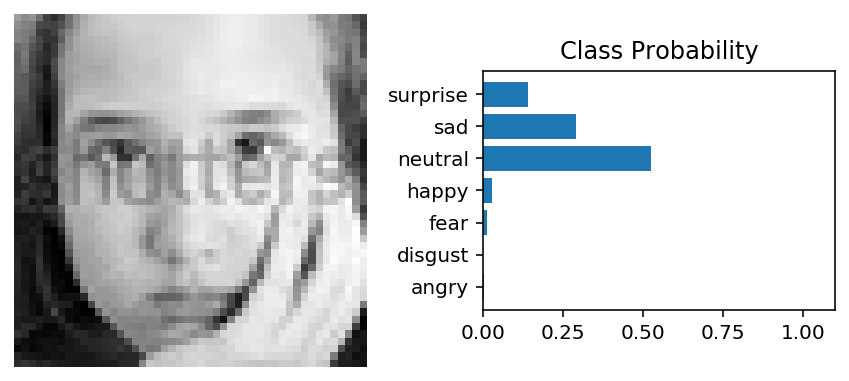

In [0]:
# Test out our network!

model.eval()

dataiter = iter(dataloaders['testloader'])
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

img = images[0].unsqueeze_(0)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
img = img[:,0,:,:]
img = img.view(1, 48, 48)

# Plot the image and probabilities
view_classify(img.view(1, 48, 48), ps)